In [3]:
import os
import sys

sys.path.insert(0, os.path.abspath('..'))
os.chdir(os.path.dirname(sys.path[0])) # Este comando hace que el notebook sea la ruta principal y poder trabajar en cascada

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [5]:
laptop = pd.read_csv('MACHINE_LEARNING/test/data/train.csv', sep=';')
laptop

laptop_ID Company            Product   TypeName  Inches  \
0         1104    Acer     Aspire ES1-523   Notebook     156   
1          114    Dell             XPS 13  Ultrabook     133   
2          172    Acer    Aspire A517-51G   Notebook     173   
3          918      HP      Elitebook 820    Netbook     125   
4          447  Lenovo  IdeaPad 320-15AST   Notebook     173   
..         ...     ...                ...        ...     ...   
575        406  Lenovo        Thinkpad X1  Ultrabook     140   
576        285  Lenovo  IdeaPad 320-17IKB   Notebook     173   
577        972    Dell             XPS 13  Ultrabook     133   
578       1205    Acer     Aspire E5-576G   Notebook     156   
579        862    Asus   Rog GL502VM-DS74     Gaming     156   

                     ScreenResolution                          Cpu   Ram  \
0                            1366x768    AMD A8-Series 7410 2.2GHz   4GB   
1    Quad HD+ / Touchscreen 3200x1800   Intel Core i7 7560U 2.4GHz   8GB   
2         IPS Panel Full HD 1920x1080   Intel Core i5 8250U 1.6GHz   8GB   
3                   Full HD 1920x1080   Intel Core i7 7500U 2.7GHz   8GB   
4                            1600x900    AMD A6-Series 9220 2.5GHz   8GB   
..                                ...                          ...   ...   
575               IPS Panel 2560x1440   Intel Core i7 7500U 2.7GHz  16GB   
576                          1600x900   Intel Core i7 7500U 2.7GHz   6GB   
577                Quad HD+ 3200x1800   Intel Core i7 6500U 2.5GHz   8GB   
578                 Full HD 1920x1080   Intel Core i5 7200U 2.5GHz   4GB   
579                 Full HD 1920x1080  Intel Core i7 7700HQ 2.8GHz  16GB   

                   Memory                           Gpu       OpSys  Weight  \
0               500GB HDD                 AMD Radeon R5  Windows 10   2.4kg   
1               256GB SSD  Intel Iris Plus Graphics 640  Windows 10  1.23kg   
2               256GB SSD          Nvidia GeForce MX150  Windows 10     3kg   
3               512GB SSD         Intel HD Graphics 620  Windows 10  1.26kg   
4                 1TB HDD                 AMD Radeon R4  Windows 10   2.8kg   
..                    ...                           ...         ...     ...   
575               1TB SSD         Intel HD Graphics 620  Windows 10  1.13kg   
576  128GB SSD +  1TB HDD          Nvidia GeForce 940MX  Windows 10   2.8kg   
577             256GB SSD         Intel HD Graphics 520  Windows 10   1.3kg   
578             256GB SSD          Nvidia GeForce 940MX  Windows 10  2.23kg   
579  128GB SSD +  1TB HDD                Nvidia GeForce         NaN     NaN   

     Price_euros  
0         3870.0  
1        13790.0  
2         8540.0  
3        14830.0  
4         5190.0  
..           ...  
575      26250.0  
576       8590.0  
577      12680.0  
578       6910.0  
579          NaN  

[580 rows x 13 columns]

In [4]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         580 non-null    int64  
 1   Company           580 non-null    object 
 2   Product           580 non-null    object 
 3   TypeName          580 non-null    object 
 4   Inches            580 non-null    int64  
 5   ScreenResolution  580 non-null    object 
 6   Cpu               580 non-null    object 
 7   Ram               580 non-null    object 
 8   Memory            580 non-null    object 
 9   Gpu               580 non-null    object 
 10  OpSys             579 non-null    object 
 11  Weight            579 non-null    object 
 12  Price_euros       579 non-null    float64
dtypes: float64(1), int64(2), object(10)
memory usage: 59.0+ KB


In [42]:
# Hacemos una copia del df
laptop_copy = laptop.copy()

In [43]:
# Vemos cuantos valores nulos tenemos 
laptop_copy[laptop_copy.isnull().any(axis=1)]


laptop_ID Company           Product TypeName  Inches   ScreenResolution  \
579        862    Asus  Rog GL502VM-DS74   Gaming     156  Full HD 1920x1080   

                             Cpu   Ram                Memory             Gpu  \
579  Intel Core i7 7700HQ 2.8GHz  16GB  128GB SSD +  1TB HDD  Nvidia GeForce   

    OpSys Weight  Price_euros  
579   NaN    NaN          NaN

In [45]:
# Eliminamos los NaN
laptop_copy.dropna(axis=0, inplace=True)


### Eliminamos las culumnas 
1. TypeName
1. laptop_ID

In [46]:
laptop_copy.drop(['laptop_ID','TypeName'],axis=1, inplace=True)

In [354]:
laptop_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 578
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           579 non-null    object 
 1   Product           579 non-null    object 
 2   Inches            579 non-null    int64  
 3   ScreenResolution  579 non-null    object 
 4   Cpu               579 non-null    object 
 5   Ram               579 non-null    object 
 6   Memory            579 non-null    object 
 7   Gpu               579 non-null    object 
 8   OpSys             579 non-null    object 
 9   Weight            579 non-null    object 
 10  Price_euros       579 non-null    float64
dtypes: float64(1), int64(1), object(9)
memory usage: 54.3+ KB


In [47]:
laptop_copy.head()

Company            Product  Inches                  ScreenResolution  \
0    Acer     Aspire ES1-523     156                          1366x768   
1    Dell             XPS 13     133  Quad HD+ / Touchscreen 3200x1800   
2    Acer    Aspire A517-51G     173       IPS Panel Full HD 1920x1080   
3      HP      Elitebook 820     125                 Full HD 1920x1080   
4  Lenovo  IdeaPad 320-15AST     173                          1600x900   

                          Cpu  Ram     Memory                           Gpu  \
0   AMD A8-Series 7410 2.2GHz  4GB  500GB HDD                 AMD Radeon R5   
1  Intel Core i7 7560U 2.4GHz  8GB  256GB SSD  Intel Iris Plus Graphics 640   
2  Intel Core i5 8250U 1.6GHz  8GB  256GB SSD          Nvidia GeForce MX150   
3  Intel Core i7 7500U 2.7GHz  8GB  512GB SSD         Intel HD Graphics 620   
4   AMD A6-Series 9220 2.5GHz  8GB    1TB HDD                 AMD Radeon R4   

        OpSys  Weight  Price_euros  
0  Windows 10   2.4kg       3870.0  
1  Windows 10  1.23kg      13790.0  
2  Windows 10     3kg       8540.0  
3  Windows 10  1.26kg      14830.0  
4  Windows 10   2.8kg       5190.0

In [48]:
def remove_str_and_convert_to_int(df, column_name,):
    df[column_name] = df[column_name].str.replace('\D+', '').astype(int)



In [49]:
# Eliminamos los str de la columna Memory
remove_str_and_convert_to_int(laptop_copy, 'Memory')

C:\Users\varel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [50]:
# Eliminamos los str de la columna Ram
remove_str_and_convert_to_int(laptop_copy,'Ram')

C:\Users\varel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [51]:
def remove_str_and_convert_to_float(df, column_name):
    df[column_name] = df[column_name].str.replace('\D+', '').astype(float)

In [52]:
#hacemos un ramplazo para normalizar los valores 

laptop_copy['Memory'] = laptop_copy['Memory'].replace({1: 1000, 10: 1000, 256500: 756, 1281: 1128, 2561: 1256, 
                                                       5121: 1512, 512256: 768,  5122: 2512, 
                                                       256256: 512, 11: 2000, 2: 2000})

In [53]:
# Eliminamos el str Kg de la columna Weight y normalizamos los valores 

laptop_copy['Weight'] = laptop_copy['Weight'].apply(lambda x: int(float(x.replace('kg', '').strip()) * 1000))


In [54]:
laptop_copy.head()

Company            Product  Inches                  ScreenResolution  \
0    Acer     Aspire ES1-523     156                          1366x768   
1    Dell             XPS 13     133  Quad HD+ / Touchscreen 3200x1800   
2    Acer    Aspire A517-51G     173       IPS Panel Full HD 1920x1080   
3      HP      Elitebook 820     125                 Full HD 1920x1080   
4  Lenovo  IdeaPad 320-15AST     173                          1600x900   

                          Cpu  Ram  Memory                           Gpu  \
0   AMD A8-Series 7410 2.2GHz    4     500                 AMD Radeon R5   
1  Intel Core i7 7560U 2.4GHz    8     256  Intel Iris Plus Graphics 640   
2  Intel Core i5 8250U 1.6GHz    8     256          Nvidia GeForce MX150   
3  Intel Core i7 7500U 2.7GHz    8     512         Intel HD Graphics 620   
4   AMD A6-Series 9220 2.5GHz    8    1000                 AMD Radeon R4   

        OpSys  Weight  Price_euros  
0  Windows 10    2400       3870.0  
1  Windows 10    1230      13790.0  
2  Windows 10    3000       8540.0  
3  Windows 10    1260      14830.0  
4  Windows 10    2800       5190.0

In [55]:
laptop_copy["OpSys"] = laptop_copy["OpSys"].replace("No OS", "macOS")


In [56]:
# cada sistema operativo se convertirá en un número entero en la columna "OpSys".

os_dict = {'Windows 10': 1,  'Linux': 2, 'Mac OS X': 3, 'Windows 7': 4, 'Chrome OS': 5, 'macOS': 6, 'Windows 10 S': 7}
laptop_copy['OpSys'] = laptop_copy['OpSys'].map(os_dict)


 1. Windows 10 = 1 
 1. Linux = 2
 1. Mac OS X = 3
 1. Windows 7 = 4
 1. Chrome OS = 5 
 1. macOS = 6
 1. Windows 10 S = 7



In [57]:
laptop_copy['OpSys'].unique()

array([1, 6, 2, 3, 4, 5, 7], dtype=int64)

In [58]:
laptop_copy.head()

Company            Product  Inches                  ScreenResolution  \
0    Acer     Aspire ES1-523     156                          1366x768   
1    Dell             XPS 13     133  Quad HD+ / Touchscreen 3200x1800   
2    Acer    Aspire A517-51G     173       IPS Panel Full HD 1920x1080   
3      HP      Elitebook 820     125                 Full HD 1920x1080   
4  Lenovo  IdeaPad 320-15AST     173                          1600x900   

                          Cpu  Ram  Memory                           Gpu  \
0   AMD A8-Series 7410 2.2GHz    4     500                 AMD Radeon R5   
1  Intel Core i7 7560U 2.4GHz    8     256  Intel Iris Plus Graphics 640   
2  Intel Core i5 8250U 1.6GHz    8     256          Nvidia GeForce MX150   
3  Intel Core i7 7500U 2.7GHz    8     512         Intel HD Graphics 620   
4   AMD A6-Series 9220 2.5GHz    8    1000                 AMD Radeon R4   

   OpSys  Weight  Price_euros  
0      1    2400       3870.0  
1      1    1230      13790.0  
2      1    3000       8540.0  
3      1    1260      14830.0  
4      1    2800       5190.0

In [368]:
# Definir patrones de nombres de modelos de GPU utilizando expresiones regulares
pattern1 = r"Nvidia\sGeForce\s(.+)"
pattern2 = r"AMD\sRadeon\s(.+)"
pattern3 = r"Intel\s(.+)"

# Crear nuevas columnas con los nombres de los modelos de GPU
laptop_copy["Gpu_Nvidia"] = laptop_copy["Gpu"].apply(lambda x: re.findall(pattern1, x)[0] if re.findall(pattern1, x) else None)
laptop_copy["Gpu_AMD"] = laptop_copy["Gpu"].apply(lambda x: re.findall(pattern2, x)[0] if re.findall(pattern2, x) else None)
laptop_copy["Gpu_Intel"] = laptop_copy["Gpu"].apply(lambda x: re.findall(pattern3, x)[0] if re.findall(pattern3, x) else None)

# # Eliminar la columna original "Gpu"
# laptop_copy.drop("Gpu", axis=1, inplace=True)

# # Guardar los datos en un nuevo archivo
# laptop_copy.to_csv("laptop_copy_models.csv", index=False)


In [369]:
laptop_copy.head()

Company            Product  Inches                  ScreenResolution  \
0    Acer     Aspire ES1-523     156                          1366x768   
1    Dell             XPS 13     133  Quad HD+ / Touchscreen 3200x1800   
2    Acer    Aspire A517-51G     173       IPS Panel Full HD 1920x1080   
3      HP      Elitebook 820     125                 Full HD 1920x1080   
4  Lenovo  IdeaPad 320-15AST     173                          1600x900   

                          Cpu  Ram  Memory                           Gpu  \
0   AMD A8-Series 7410 2.2GHz    4     500                 AMD Radeon R5   
1  Intel Core i7 7560U 2.4GHz    8     256  Intel Iris Plus Graphics 640   
2  Intel Core i5 8250U 1.6GHz    8     256          Nvidia GeForce MX150   
3  Intel Core i7 7500U 2.7GHz    8     512         Intel HD Graphics 620   
4   AMD A6-Series 9220 2.5GHz    8    1000                 AMD Radeon R4   

   OpSys  Weight  Price_euros Gpu_Nvidia Gpu_AMD               Gpu_Intel  
0      1    2400       3870.0       None      R5                    None  
1      1    1230      13790.0       None    None  Iris Plus Graphics 640  
2      1    3000       8540.0      MX150    None                    None  
3      1    1260      14830.0       None    None         HD Graphics 620  
4      1    2800       5190.0       None      R4                    None

In [370]:
laptop_copy['Gpu_Intel'].unique()

array([None, 'Iris Plus Graphics 640', 'HD Graphics 620',
       'UHD Graphics 620', 'HD Graphics 505', 'HD Graphics 520',
       'HD Graphics 400', 'HD Graphics 515', 'HD Graphics 6000',
       'HD Graphics 615', 'Iris Graphics 540', 'HD Graphics',
       'HD Graphics 500', 'HD Graphics 630', 'HD Graphics 405',
       'Iris Pro Graphics', 'HD Graphics 5300', 'HD Graphics 510',
       'Iris Plus Graphics 650', 'HD Graphics 620 ', 'Graphics 620',
       'HD Graphics 530'], dtype=object)

In [371]:
gpu_dict = {
    None: 0,
    'Iris Plus Graphics 640': 1, 'HD Graphics 620': 2,'UHD Graphics 620': 3,
    'HD Graphics 505': 4, 'HD Graphics 520': 5, 'HD Graphics 400': 6,
    'HD Graphics 515': 7, 'HD Graphics 6000': 8, 'HD Graphics 615': 9,
    'Iris Graphics 540': 10, 'HD Graphics': 11, 'HD Graphics 500': 12,
    'HD Graphics 630': 13, 'HD Graphics 405': 14, 'Iris Pro Graphics': 15,
    'HD Graphics 5300': 16,'HD Graphics 510': 17, 'Iris Plus Graphics 650': 18,
    'HD Graphics 620 ': 19,'Graphics 620': 20,'HD Graphics 530': 21
}

laptop_copy['Gpu_Intel'] = laptop_copy['Gpu_Intel'].map(gpu_dict)


In [372]:
laptop_copy['Gpu_AMD'].unique()

array(['R5', None, 'R4', 'R7 M360', 'R5 M330', 'R4 Graphics', 'R7 M445',
       'R2', '520', 'R5 M420', '530', 'RX 580', 'R2 Graphics', 'R5 M430',
       'R5 520', 'R7 M440', 'R7', 'RX 550', 'R9 M385', 'R5 M315',
       'R7 M465', 'RX 540', 'R7 M365X', 'R7 M460'], dtype=object)

In [373]:
gpu_amd ={'R5': 1, None: 0, 'R4': 2, 'R7 M360': 3, 'R5 M330': 4, 'R4 Graphics': 5, 'R7 M445': 6,
       'R2': 7, '520': 8, 'R5 M420': 9, '530': 10, 'RX 580': 11, 'R2 Graphics': 12, 'R5 M430': 13,
       'R5 520': 14, 'R7 M440': 15, 'R7': 16, 'RX 550': 17, 'R9 M385': 18, 'R5 M315': 19,
       'R7 M465': 20, 'RX 540': 21, 'R7 M365X': 22, 'R7 M460': 23}

laptop_copy['Gpu_AMD'] = laptop_copy['Gpu_AMD'].map(gpu_amd)


In [374]:
laptop_copy['Gpu_Nvidia'].unique()

array([None, 'MX150', '940MX', 'GTX 1050', 'GTX 1050 Ti', 'GTX 1070',
       '930MX', '920M', 'GTX 940MX', 'GTX 1060', 'GTX 950M', 'MX130',
       'GTX 960M', '920MX', 'GTX 970M', 'GTX 980M', '920MX ', '150MX',
       'GTX 965M', '930M', 'GTX 960<U+039C>', 'GTX 1080', '930MX ',
       'GTX 1050M', 'GT 940MX', '920', '940M', 'GTX 960'], dtype=object)

In [375]:
gpu_nvidia = {None: 0, 'MX150': 1, '940MX': 2, 'GTX 1050': 3, 'GTX 1050 Ti': 4, 'GTX 1070': 5,
       '930MX': 6, '920M': 7, 'GTX 940MX': 8, 'GTX 1060': 9, 'GTX 950M': 10, 'MX130': 11,
       'GTX 960M': 12, '920MX': 13, 'GTX 970M': 14, 'GTX 980M': 15, '920MX ': 16, '150MX': 17,
       'GTX 965M': 18, '930M': 19, 'GTX 960<U+039C>': 20, 'GTX 1080': 21, '930MX ': 22,
       'GTX 1050M': 23, 'GT 940MX': 24, '920': 25, '940M': 26, 'GTX 960': 27}

laptop_copy['Gpu_Nvidia'] = laptop_copy['Gpu_Nvidia'].map(gpu_nvidia)


In [376]:
laptop_copy

Company             Product  Inches                  ScreenResolution  \
0      Acer      Aspire ES1-523     156                          1366x768   
1      Dell              XPS 13     133  Quad HD+ / Touchscreen 3200x1800   
2      Acer     Aspire A517-51G     173       IPS Panel Full HD 1920x1080   
3        HP       Elitebook 820     125                 Full HD 1920x1080   
4    Lenovo   IdeaPad 320-15AST     173                          1600x900   
..      ...                 ...     ...                               ...   
574  Lenovo  IdeaPad 320-15IKBN     156                 Full HD 1920x1080   
575  Lenovo         Thinkpad X1     140               IPS Panel 2560x1440   
576  Lenovo   IdeaPad 320-17IKB     173                          1600x900   
577    Dell              XPS 13     133                Quad HD+ 3200x1800   
578    Acer      Aspire E5-576G     156                 Full HD 1920x1080   

                            Cpu  Ram  Memory                           Gpu  \
0     AMD A8-Series 7410 2.2GHz    4     500                 AMD Radeon R5   
1    Intel Core i7 7560U 2.4GHz    8     256  Intel Iris Plus Graphics 640   
2    Intel Core i5 8250U 1.6GHz    8     256          Nvidia GeForce MX150   
3    Intel Core i7 7500U 2.7GHz    8     512         Intel HD Graphics 620   
4     AMD A6-Series 9220 2.5GHz    8    1000                 AMD Radeon R4   
..                          ...  ...     ...                           ...   
574  Intel Core i5 7200U 2.5GHz    8     256          Nvidia GeForce 940MX   
575  Intel Core i7 7500U 2.7GHz   16    1000         Intel HD Graphics 620   
576  Intel Core i7 7500U 2.7GHz    6    1128          Nvidia GeForce 940MX   
577  Intel Core i7 6500U 2.5GHz    8     256         Intel HD Graphics 520   
578  Intel Core i5 7200U 2.5GHz    4     256          Nvidia GeForce 940MX   

     OpSys  Weight  Price_euros  Gpu_Nvidia  Gpu_AMD  Gpu_Intel  
0        1    2400       3870.0           0        1          0  
1        1    1230      13790.0           0        0          1  
2        1    3000       8540.0           1        0          0  
3        1    1260      14830.0           0        0          2  
4        1    2800       5190.0           0        2          0  
..     ...     ...          ...         ...      ...        ...  
574      6    2200       6290.0           2        0          0  
575      1    1130      26250.0           0        0          2  
576      1    2800       8590.0           2        0          0  
577      1    1300      12680.0           0        0          5  
578      1    2230       6910.0           2        0          0  

[579 rows x 14 columns]

In [32]:
laptop_copy[['Modelo', 'Velocidad', 'Frecuencia']] = laptop_copy['Cpu'].str.split(n=2, expand=True)


In [39]:


laptop_copy['Frecuencia'] = laptop_copy['Frecuencia'].apply(lambda x: re.findall(r'\d+\.*\d*', x)[0]).astype(float)


In [41]:
laptop_copy

Company             Product  Inches                  ScreenResolution  \
578    Acer      Aspire E5-576G     156                 Full HD 1920x1080   
577    Dell              XPS 13     133                Quad HD+ 3200x1800   
576  Lenovo   IdeaPad 320-17IKB     173                          1600x900   
575  Lenovo         Thinkpad X1     140               IPS Panel 2560x1440   
574  Lenovo  IdeaPad 320-15IKBN     156                 Full HD 1920x1080   
..      ...                 ...     ...                               ...   
4    Lenovo   IdeaPad 320-15AST     173                          1600x900   
3        HP       Elitebook 820     125                 Full HD 1920x1080   
2      Acer     Aspire A517-51G     173       IPS Panel Full HD 1920x1080   
1      Dell              XPS 13     133  Quad HD+ / Touchscreen 3200x1800   
0      Acer      Aspire ES1-523     156                          1366x768   

                            Cpu   Ram                Memory  \
578  Intel Core i5 7200U 2.5GHz   4GB             256GB SSD   
577  Intel Core i7 6500U 2.5GHz   8GB             256GB SSD   
576  Intel Core i7 7500U 2.7GHz   6GB  128GB SSD +  1TB HDD   
575  Intel Core i7 7500U 2.7GHz  16GB               1TB SSD   
574  Intel Core i5 7200U 2.5GHz   8GB             256GB SSD   
..                          ...   ...                   ...   
4     AMD A6-Series 9220 2.5GHz   8GB               1TB HDD   
3    Intel Core i7 7500U 2.7GHz   8GB             512GB SSD   
2    Intel Core i5 8250U 1.6GHz   8GB             256GB SSD   
1    Intel Core i7 7560U 2.4GHz   8GB             256GB SSD   
0     AMD A8-Series 7410 2.2GHz   4GB             500GB HDD   

                              Gpu       OpSys  Weight  Price_euros  \
578          Nvidia GeForce 940MX  Windows 10  2.23kg       6910.0   
577         Intel HD Graphics 520  Windows 10   1.3kg      12680.0   
576          Nvidia GeForce 940MX  Windows 10   2.8kg       8590.0   
575         Intel HD Graphics 620  Windows 10  1.13kg      26250.0   
574          Nvidia GeForce 940MX       No OS   2.2kg       6290.0   
..                            ...         ...     ...          ...   
4                   AMD Radeon R4  Windows 10   2.8kg       5190.0   
3           Intel HD Graphics 620  Windows 10  1.26kg      14830.0   
2            Nvidia GeForce MX150  Windows 10     3kg       8540.0   
1    Intel Iris Plus Graphics 640  Windows 10  1.23kg      13790.0   
0                   AMD Radeon R5  Windows 10   2.4kg       3870.0   

    Cpu_brand_model Modelo  Velocidad  Frecuencia  
578      Intel Core  Intel       Core         5.0  
577      Intel Core  Intel       Core         7.0  
576      Intel Core  Intel       Core         7.0  
575      Intel Core  Intel       Core         7.0  
574      Intel Core  Intel       Core         5.0  
..              ...    ...        ...         ...  
4               AMD    AMD  A6-Series      9220.0  
3        Intel Core  Intel       Core         7.0  
2        Intel Core  Intel       Core         5.0  
1        Intel Core  Intel       Core         7.0  
0               AMD    AMD  A8-Series      7410.0  

[579 rows x 15 columns]

In [40]:
laptop_copy['Frecuencia'].unique()

array([5.000e+00, 7.000e+00, 3.000e+00, 4.200e+03, 9.220e+03, 9.420e+03,
       3.710e+03, 3.060e+03, 1.200e+00, 6.000e+00, 3.205e+03, 3.350e+03,
       7.410e+03, 3.050e+03, 9.620e+03, 3.855e+03, 9.410e+03, 8.800e+03,
       3.700e+03, 4.405e+03, 7.310e+03, 3.450e+03, 9.720e+03, 2.000e+00,
       7.110e+03, 1.100e+00, 6.110e+03])

In [34]:
laptop_copy['Cpu_brand_model'].value_counts()

Intel Core       496
Intel Celeron     35
AMD               24
Intel Pentium     19
Intel Atom         3
AMD FX             1
Intel Xeon         1
Name: Cpu_brand_model, dtype: int64

In [31]:
laptop_copy['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz              84
Intel Core i7 7700HQ 2.8GHz             66
Intel Core i7 7500U 2.7GHz              54
Intel Core i5 6200U 2.3GHz              37
Intel Core i7 8550U 1.8GHz              31
                                        ..
Intel Pentium Dual Core 4405U 2.1GHz     1
AMD FX 8800P 2.1GHz                      1
Intel Core i5 6440HQ 2.6GHz              1
Intel Core i5 2.3GHz                     1
AMD A6-Series 9220 2.9GHz                1
Name: Cpu, Length: 73, dtype: int64

In [377]:
laptop_copy['Cpu'].unique()

array(['AMD A8-Series 7410 2.2GHz', 'Intel Core i7 7560U 2.4GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i7 7500U 2.7GHz',
       'AMD A6-Series 9220 2.5GHz', 'Intel Core i7 6500U 2.5GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i5 7200U 2.5GHz',
       'Intel Core i7 7700HQ 2.8GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Core i5 6300U 2.4GHz',
       'Intel Celeron Dual Core N3060 1.6GHz', 'Intel Core M 1.1GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 6600U 2.6GHz', 'Intel Core i3 7100U 2.4GHz',
       'Intel Core i5 7440HQ 2.8GHz', 'Intel Core i7 7600U 2.8GHz',
       'Intel Core i7 6820HQ 2.7GHz', 'Intel Core i5 6200U 2.3GHz',
       'AMD A6-Series 9220 2.9GHz', 'Intel Core M M3-6Y30 0.9GHz',
       'Intel Core i3 6006U 2.0GHz', 'Intel Core i5 1.8GHz',
       'AMD E-Series 6110 1.5GHz', 'Intel Core i7 7Y75 1.3GHz',
       'Intel Core i7 8650U 1.9GHz', 'Intel Core i7 6560U 2.2GHz',
       'Intel 

In [10]:
# Definimos una expresión regular para extraer la marca y modelo del procesador
regex = r'^(\w+\s+\w+|\w+)\s+.*$'

# Creamos una nueva columna que contenga solo la marca y modelo del procesador
laptop_copy['Cpu_brand_model'] =laptop_copy['Cpu'].str.extract(regex, expand=True)

# Mostramos las primeras filas del dataframe con la nueva columna agregada
laptop_copy.head()


Company            Product  Inches                  ScreenResolution  \
0    Acer     Aspire ES1-523     156                          1366x768   
1    Dell             XPS 13     133  Quad HD+ / Touchscreen 3200x1800   
2    Acer    Aspire A517-51G     173       IPS Panel Full HD 1920x1080   
3      HP      Elitebook 820     125                 Full HD 1920x1080   
4  Lenovo  IdeaPad 320-15AST     173                          1600x900   

                          Cpu  Ram     Memory                           Gpu  \
0   AMD A8-Series 7410 2.2GHz  4GB  500GB HDD                 AMD Radeon R5   
1  Intel Core i7 7560U 2.4GHz  8GB  256GB SSD  Intel Iris Plus Graphics 640   
2  Intel Core i5 8250U 1.6GHz  8GB  256GB SSD          Nvidia GeForce MX150   
3  Intel Core i7 7500U 2.7GHz  8GB  512GB SSD         Intel HD Graphics 620   
4   AMD A6-Series 9220 2.5GHz  8GB    1TB HDD                 AMD Radeon R4   

        OpSys  Weight  Price_euros Cpu_brand_model  
0  Windows 10   2.4kg       3870.0             AMD  
1  Windows 10  1.23kg      13790.0      Intel Core  
2  Windows 10     3kg       8540.0      Intel Core  
3  Windows 10  1.26kg      14830.0      Intel Core  
4  Windows 10   2.8kg       5190.0             AMD

In [17]:
laptop_copy.sort_index( ascending=False, inplace=True)
laptop_copy.head()

Company             Product  Inches     ScreenResolution  \
578    Acer      Aspire E5-576G     156    Full HD 1920x1080   
577    Dell              XPS 13     133   Quad HD+ 3200x1800   
576  Lenovo   IdeaPad 320-17IKB     173             1600x900   
575  Lenovo         Thinkpad X1     140  IPS Panel 2560x1440   
574  Lenovo  IdeaPad 320-15IKBN     156    Full HD 1920x1080   

                            Cpu   Ram                Memory  \
578  Intel Core i5 7200U 2.5GHz   4GB             256GB SSD   
577  Intel Core i7 6500U 2.5GHz   8GB             256GB SSD   
576  Intel Core i7 7500U 2.7GHz   6GB  128GB SSD +  1TB HDD   
575  Intel Core i7 7500U 2.7GHz  16GB               1TB SSD   
574  Intel Core i5 7200U 2.5GHz   8GB             256GB SSD   

                       Gpu       OpSys  Weight  Price_euros Cpu_brand_model  
578   Nvidia GeForce 940MX  Windows 10  2.23kg       6910.0      Intel Core  
577  Intel HD Graphics 520  Windows 10   1.3kg      12680.0      Intel Core  
576   Nvidia GeForce 940MX  Windows 10   2.8kg       8590.0      Intel Core  
575  Intel HD Graphics 620  Windows 10  1.13kg      26250.0      Intel Core  
574   Nvidia GeForce 940MX       No OS   2.2kg       6290.0      Intel Core

In [11]:
laptop_copy['Cpu_brand_model'].value_counts()

Intel Core       496
Intel Celeron     35
AMD               24
Intel Pentium     19
Intel Atom         3
Intel Xeon         1
AMD FX             1
Name: Cpu_brand_model, dtype: int64

In [218]:
# Crear dos nuevas columnas
laptop_copy['Intel'] = laptop_copy['Cpu'].str.contains('Intel')
laptop_copy['AMD'] = laptop_copy['Cpu'].str.contains('AMD')

# Visualizar el resultado
laptop_copy.head()


Company            Product  Inches                  ScreenResolution  \
0    Acer     Aspire ES1-523     156                          1366x768   
1    Dell             XPS 13     133  Quad HD+ / Touchscreen 3200x1800   
2    Acer    Aspire A517-51G     173       IPS Panel Full HD 1920x1080   
3      HP      Elitebook 820     125                 Full HD 1920x1080   
4  Lenovo  IdeaPad 320-15AST     173                          1600x900   

                          Cpu  Ram  Memory                           Gpu  \
0   AMD A8-Series 7410 2.2GHz    4     500                 AMD Radeon R5   
1  Intel Core i7 7560U 2.4GHz    8     256  Intel Iris Plus Graphics 640   
2  Intel Core i5 8250U 1.6GHz    8     256          Nvidia GeForce MX150   
3  Intel Core i7 7500U 2.7GHz    8     512         Intel HD Graphics 620   
4   AMD A6-Series 9220 2.5GHz    8    1000                 AMD Radeon R4   

   OpSys  Weight  Price_euros  Intel    AMD  
0      1    2400       3870.0  False   True  
1      1    1230      13790.0   True  False  
2      1    3000       8540.0   True  False  
3      1    1260      14830.0   True  False  
4      1    2800       5190.0  False   True

### Transformammos 
1. ***INTEL = 1***
1. ***AMD = 0***

In [59]:
laptop_copy['Cpu'] = laptop_copy['Cpu'].str.contains('Intel Core i7').astype(int)



0    0.595855
1    0.404145
Name: Cpu, dtype: float64

In [60]:
laptop_copy.head()

Company            Product  Inches                  ScreenResolution  Cpu  \
0    Acer     Aspire ES1-523     156                          1366x768    0   
1    Dell             XPS 13     133  Quad HD+ / Touchscreen 3200x1800    1   
2    Acer    Aspire A517-51G     173       IPS Panel Full HD 1920x1080    0   
3      HP      Elitebook 820     125                 Full HD 1920x1080    1   
4  Lenovo  IdeaPad 320-15AST     173                          1600x900    0   

   Ram  Memory                           Gpu  OpSys  Weight  Price_euros  
0    4     500                 AMD Radeon R5      1    2400       3870.0  
1    8     256  Intel Iris Plus Graphics 640      1    1230      13790.0  
2    8     256          Nvidia GeForce MX150      1    3000       8540.0  
3    8     512         Intel HD Graphics 620      1    1260      14830.0  
4    8    1000                 AMD Radeon R4      1    2800       5190.0

In [229]:
laptop_copy['Gpu'].sort_values().unique()

array(['AMD', 'Intel', 'Nvidia'], dtype=object)

### ***Tranformamos los valores a numericos*** 
1. ***Intel = 1***
1. ***AMD = 3***
1. ***Nvidia = 2***

In [221]:
laptop_copy['Gpu'] = laptop_copy['Gpu'].apply(lambda x: 'Intel' if 'intel' in x.lower() else ('AMD' if 'amd' in x.lower() else ('Nvidia' if 'nvidia' in x.lower() else 'Otro')))


In [200]:
laptop_copy['Gpu'] = laptop_copy['Gpu'].apply(lambda x: 1 if 'intel' in x.lower() else (2 if 'nvidia' in x.lower() else 3))


In [222]:
laptop_copy

Company             Product  Inches                  ScreenResolution  \
0      Acer      Aspire ES1-523     156                          1366x768   
1      Dell              XPS 13     133  Quad HD+ / Touchscreen 3200x1800   
2      Acer     Aspire A517-51G     173       IPS Panel Full HD 1920x1080   
3        HP       Elitebook 820     125                 Full HD 1920x1080   
4    Lenovo   IdeaPad 320-15AST     173                          1600x900   
..      ...                 ...     ...                               ...   
574  Lenovo  IdeaPad 320-15IKBN     156                 Full HD 1920x1080   
575  Lenovo         Thinkpad X1     140               IPS Panel 2560x1440   
576  Lenovo   IdeaPad 320-17IKB     173                          1600x900   
577    Dell              XPS 13     133                Quad HD+ 3200x1800   
578    Acer      Aspire E5-576G     156                 Full HD 1920x1080   

     Cpu  Ram  Memory     Gpu  OpSys  Weight  Price_euros  Intel    AMD  
0      0    4     500     AMD      1    2400       3870.0  False   True  
1      1    8     256   Intel      1    1230      13790.0   True  False  
2      1    8     256  Nvidia      1    3000       8540.0   True  False  
3      1    8     512   Intel      1    1260      14830.0   True  False  
4      0    8    1000     AMD      1    2800       5190.0  False   True  
..   ...  ...     ...     ...    ...     ...          ...    ...    ...  
574    1    8     256  Nvidia      6    2200       6290.0   True  False  
575    1   16    1000   Intel      1    1130      26250.0   True  False  
576    1    6    1128  Nvidia      1    2800       8590.0   True  False  
577    1    8     256   Intel      1    1300      12680.0   True  False  
578    1    4     256  Nvidia      1    2230       6910.0   True  False  

[579 rows x 13 columns]

In [387]:
# Define una función para extraer el tamaño de la pantalla en pulgadas
def extract_screen_size(resolution):
    match = re.search(r'(\d+(\.\d+)?)["”]', resolution)
    if match:
        return float(match.group(1))
    return None

# Aplica la función a la columna "ScreenResolution" para crear una nueva columna "ScreenSize"
laptop_copy['ScreenSize'] = laptop_copy['ScreenResolution'].apply(extract_screen_size)


In [388]:
highest_ram_laptops = laptop_copy.sort_values('Ram', ascending=False)
highest_ram_laptops


Company             Product  Inches                     ScreenResolution  \
42     Dell        Alienware 17     173          IPS Panel Full HD 1920x1080   
292    Dell              XPS 15     156  4K Ultra HD / Touchscreen 3840x2160   
159    Dell        Alienware 17     173      IPS Panel 4K Ultra HD 3840x2160   
115     MSI     GT80S 6QF-074US     184                    Full HD 1920x1080   
309   Razer           Blade Pro     173  4K Ultra HD / Touchscreen 3840x2160   
..      ...                 ...     ...                                  ...   
144  Lenovo  IdeaPad 100S-14IBR     140                             1366x768   
139  Lenovo  IdeaPad 100S-14IBR     140                             1366x768   
96   Lenovo      Lenovo IdeaPad     116                             1366x768   
325    Dell       Inspiron 3552     156                             1366x768   
298    Dell       Inspiron 3552     156                             1366x768   

                                      Cpu  Ram  Memory  \
42            Intel Core i7 7700HQ 2.8GHz   32    1512   
292           Intel Core i7 7700HQ 2.8GHz   32    1000   
159           Intel Core i7 7700HQ 2.8GHz   32    1512   
115           Intel Core i7 6920HQ 2.9GHz   32    1512   
309           Intel Core i7 7820HK 2.9GHz   32     512   
..                                    ...  ...     ...   
144  Intel Celeron Dual Core N3050 1.6GHz    2      64   
139  Intel Celeron Dual Core N3050 1.6GHz    2      64   
96   Intel Celeron Dual Core N3350 1.1GHz    2      32   
325  Intel Celeron Dual Core N3050 1.6GHz    2     500   
298  Intel Celeron Dual Core N3050 1.6GHz    2     500   

                         Gpu  OpSys  Weight  Price_euros  Gpu_Nvidia  Gpu_AMD  \
42   Nvidia GeForce GTX 1070      1    4420     307289.0           5        0   
292  Nvidia GeForce GTX 1050      1    2060      26390.0           3        0   
159  Nvidia GeForce GTX 1070      1    4420     314737.0           5        0   
115       Nvidia GTX 980 SLI      1    4400      27990.0           0        0   
309  Nvidia GeForce GTX 1080      1    3490      54990.0          21        0   
..                       ...    ...     ...          ...         ...      ...   
144        Intel HD Graphics      1    1500       2290.0           0        0   
139        Intel HD Graphics      1    1500       2290.0           0        0   
96     Intel HD Graphics 500      1    1150      30445.0           0        0   
325        Intel HD Graphics      1    2200       3790.0           0        0   
298        Intel HD Graphics      1    2200       3790.0           0        0   

     Gpu_Intel Cpu_brand_model ScreenSize  
42           0      Intel Core       None  
292          0      Intel Core       None  
159          0      Intel Core       None  
115          0      Intel Core       None  
309          0      Intel Core       None  
..         ...             ...        ...  
144         11   Intel Celeron       None  
139         11   Intel Celeron       None  
96          12   Intel Celeron       None  
325         11   Intel Celeron       None  
298         11   Intel Celeron       None  

[579 rows x 16 columns]

In [66]:
laptop_copy['Product'].unique()

array(['Aspire ES1-523', 'XPS 13', 'Aspire A517-51G', 'Elitebook 820',
       'IdeaPad 320-15AST', 'IdeaPad 500-15ISK', 'IdeaPad 520S-14IKB',
       'Pavilion 14-BK001nv', 'Omen 17-w212nv', 'Rog GL553VE-FY052T',
       'Latitude 3180', 'Yoga 720-13IKB', 'IdeaPad 320-15IKBN',
       'Mi Notebook', 'EliteBook 850', 'Aspire ES1-531', 'MacBook 12"',
       'Latitude E5570', 'XPS 15', 'Alienware 17', 'Inspiron 7567',
       'B51-80 (i7-6500U/8GB/1008GB/Radeon', 'Spectre 13-V111dx',
       'Inspiron 3567', 'Spectre Pro', 'Latitude 7480', 'ProBook 440',
       'Swift 3', 'Latitude 5480',
       'X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce', 'EliteBook x360',
       'Notebook Odyssey', 'Precision 3520', 'ThinkPad L470',
       'Probook 450', 'Aspire 5', 'Rog GL753VE-GC070T', 'Blade Pro',
       'Chromebook 14', 'Chromebook Flip', 'Tecra Z50-C-144',
       'Insprion 5767', 'Macbook Air', '250 G6',
       'E402WA-GA007T (E2-6110/4GB/64GB/W10', 'VivoBook S14',
       'Latitude 5590', 'Yoga 900-13IS

In [380]:
avg_weight_by_company = laptop_copy.groupby('Company')['Weight'].mean()
avg_weight_by_company


Company
Acer         2176.000000
Apple        1249.000000
Asus         2200.301587
Dell         2092.086331
Fujitsu      2250.000000
Google       1100.000000
HP           1906.068376
LG           1030.000000
Lenovo       1970.451128
MSI          2742.222222
Mediacom     1316.666667
Microsoft    1251.333333
Razer        2720.000000
Samsung      1513.333333
Toshiba      1699.583333
Xiaomi       1620.000000
Name: Weight, dtype: float64

In [134]:
count_by_resolution = laptop_copy.groupby('ScreenResolution').size()
count_by_resolution


ScreenResolution
1366x768                                         149
1440x900                                           3
1600x900                                           9
1920x1080                                          1
2560x1440                                          2
4K Ultra HD / Touchscreen 3840x2160                4
4K Ultra HD 3840x2160                              1
Full HD / Touchscreen 1920x1080                   20
Full HD 1920x1080                                218
IPS Panel 1366x768                                 1
IPS Panel 2560x1440                                2
IPS Panel 4K Ultra HD / Touchscreen 3840x2160      5
IPS Panel 4K Ultra HD 3840x2160                    6
IPS Panel Full HD / Touchscreen 1920x1080         18
IPS Panel Full HD 1920x1080                       98
IPS Panel Full HD 2560x1440                        1
IPS Panel Quad HD+ / Touchscreen 3200x1800         3
IPS Panel Quad HD+ 3200x1800                       1
IPS Panel Retina Display 2304

In [381]:
most_expensive_by_company = laptop_copy.loc[laptop_copy.groupby('Company')['Price_euros'].idxmax()]
most_expensive_by_company


Company            Product  Inches  \
306       Acer           Aspire 3     156   
165      Apple        MacBook Pro     154   
484       Asus       VivoBook Pro     156   
159       Dell       Alienware 17     173   
390    Fujitsu      LifeBook A557     156   
494     Google    Pixelbook (Core     123   
304         HP      EliteBook 820     125   
92          LG        Gram 15Z970     156   
87      Lenovo      ThinkPad T570     156   
114        MSI         GS60 Ghost     156   
370   Mediacom     SmartBook Edge     133   
378  Microsoft     Surface Laptop     135   
309      Razer          Blade Pro     173   
394    Samsung         Notebook 9     150   
142    Toshiba  Portege X30-D-10K     133   
262     Xiaomi        Mi Notebook     156   

                              ScreenResolution  \
306                                   1366x768   
165         IPS Panel Retina Display 2880x1800   
484                          Full HD 1920x1080   
159            IPS Panel 4K Ultra HD 3840x2160   
390                                   1366x768   
494                      Touchscreen 2400x1600   
304                          Full HD 1920x1080   
92   IPS Panel Full HD / Touchscreen 1920x1080   
87                 IPS Panel Full HD 1920x1080   
114                          Full HD 1920x1080   
370                IPS Panel Full HD 1920x1080   
378                      Touchscreen 2256x1504   
309        4K Ultra HD / Touchscreen 3840x2160   
394                          Full HD 1920x1080   
142                          Full HD 1920x1080   
262                IPS Panel Full HD 1920x1080   

                                      Cpu  Ram  Memory  \
306  Intel Pentium Quad Core N4200 1.1GHz    4    1000   
165                  Intel Core i7 2.2GHz   16     256   
484           Intel Core i5 7300HQ 2.5GHz    8    1000   
159           Intel Core i7 7700HQ 2.8GHz   32    1512   
390            Intel Core i5 7200U 2.5GHz    8     256   
494             Intel Core i5 7Y57 1.2GHz    8     256   
304           Intel Core i7 6500U 2.50GHz    8     256   
92             Intel Core i7 7500U 2.7GHz   16     512   
87             Intel Core i5 7200U 2.5GHz    8     512   
114           Intel Core i7 6700HQ 2.6GHz   16    1128   
370  Intel Celeron Quad Core N3450 1.1GHz    4      32   
378            Intel Core i7 7660U 2.5GHz    8     256   
309           Intel Core i7 7820HK 2.9GHz   32     512   
394            Intel Core i7 7500U 2.7GHz   16     256   
142            Intel Core i7 7500U 2.7GHz   16     512   
262            Intel Core i7 8550U 1.8GHz   16     256   

                              Gpu  OpSys  Weight  Price_euros  Gpu_Nvidia  \
306         Intel HD Graphics 505      1    2100      36351.0           0   
165       Intel Iris Pro Graphics      3    2040     213997.0           0   
484       Nvidia GeForce GTX 1050      1    1990      90662.0           3   
159       Nvidia GeForce GTX 1070      1    4420     314737.0           5   
390         Intel HD Graphics 620      1    2200       7990.0           0   
494         Intel HD Graphics 615      5    1100      15590.0           0   
304         Intel HD Graphics 520      4    1260     229695.0           0   
92          Intel HD Graphics 620      1    1080      20990.0           0   
87          Intel HD Graphics 620      1    1950     196299.0           0   
114       Nvidia GeForce GTX 970M      1    1910     215337.0          14   
370         Intel HD Graphics 500      1    1200       3690.0           0   
378  Intel Iris Plus Graphics 640      7    1250      17990.0           0   
309       Nvidia GeForce GTX 1080      1    3490      54990.0          21   
394          Nvidia GeForce 940MX      1    1230      18490.0           2   
142         Intel HD Graphics 620      1    1050      22260.0           0   
262          Nvidia GeForce MX150      6    1950     139995.0           1   

     Gpu_AMD  Gpu_Intel Cpu_brand_model  
306        0          4   Intel Pentium  
165      

In [382]:
cpu_laptops = laptop_copy.loc[laptop_copy['Cpu'].str.contains('Intel |AMD')]
cpu_laptops

Company             Product  Inches                  ScreenResolution  \
0      Acer      Aspire ES1-523     156                          1366x768   
1      Dell              XPS 13     133  Quad HD+ / Touchscreen 3200x1800   
2      Acer     Aspire A517-51G     173       IPS Panel Full HD 1920x1080   
3        HP       Elitebook 820     125                 Full HD 1920x1080   
4    Lenovo   IdeaPad 320-15AST     173                          1600x900   
..      ...                 ...     ...                               ...   
574  Lenovo  IdeaPad 320-15IKBN     156                 Full HD 1920x1080   
575  Lenovo         Thinkpad X1     140               IPS Panel 2560x1440   
576  Lenovo   IdeaPad 320-17IKB     173                          1600x900   
577    Dell              XPS 13     133                Quad HD+ 3200x1800   
578    Acer      Aspire E5-576G     156                 Full HD 1920x1080   

                            Cpu  Ram  Memory                           Gpu  \
0     AMD A8-Series 7410 2.2GHz    4     500                 AMD Radeon R5   
1    Intel Core i7 7560U 2.4GHz    8     256  Intel Iris Plus Graphics 640   
2    Intel Core i5 8250U 1.6GHz    8     256          Nvidia GeForce MX150   
3    Intel Core i7 7500U 2.7GHz    8     512         Intel HD Graphics 620   
4     AMD A6-Series 9220 2.5GHz    8    1000                 AMD Radeon R4   
..                          ...  ...     ...                           ...   
574  Intel Core i5 7200U 2.5GHz    8     256          Nvidia GeForce 940MX   
575  Intel Core i7 7500U 2.7GHz   16    1000         Intel HD Graphics 620   
576  Intel Core i7 7500U 2.7GHz    6    1128          Nvidia GeForce 940MX   
577  Intel Core i7 6500U 2.5GHz    8     256         Intel HD Graphics 520   
578  Intel Core i5 7200U 2.5GHz    4     256          Nvidia GeForce 940MX   

     OpSys  Weight  Price_euros  Gpu_Nvidia  Gpu_AMD  Gpu_Intel  \
0        1    2400       3870.0           0        1          0   
1        1    1230      13790.0           0        0          1   
2        1    3000       8540.0           1        0          0   
3        1    1260      14830.0           0        0          2   
4        1    2800       5190.0           0        2          0   
..     ...     ...          ...         ...      ...        ...   
574      6    2200       6290.0           2        0          0   
575      1    1130      26250.0           0        0          2   
576      1    2800       8590.0           2        0          0   
577      1    1300      12680.0           0        0          5   
578      1    2230       6910.0           2        0          0   

    Cpu_brand_model  
0               AMD  
1        Intel Core  
2        Intel Core  
3        Intel Core  
4               AMD  
..              ...  
574      Intel Core  
575      Intel Core  
576      Intel Core  
577      Intel Core  
578      Intel Core  

[579 rows x 15 columns]

In [383]:
gpu_laptops = laptop_copy.loc[laptop_copy['Gpu'].str.contains('Nvidia|AMD')]
gpu_laptops


Company              Product  Inches             ScreenResolution  \
0      Acer       Aspire ES1-523     156                     1366x768   
2      Acer      Aspire A517-51G     173  IPS Panel Full HD 1920x1080   
4    Lenovo    IdeaPad 320-15AST     173                     1600x900   
5    Lenovo    IdeaPad 500-15ISK     156            Full HD 1920x1080   
7        HP  Pavilion 14-BK001nv     140  IPS Panel Full HD 1920x1080   
..      ...                  ...     ...                          ...   
572  Lenovo   IdeaPad Y700-15ISK     156  IPS Panel Full HD 1920x1080   
573  Lenovo       ThinkPad T470p     140  IPS Panel Full HD 1920x1080   
574  Lenovo   IdeaPad 320-15IKBN     156            Full HD 1920x1080   
576  Lenovo    IdeaPad 320-17IKB     173                     1600x900   
578    Acer       Aspire E5-576G     156            Full HD 1920x1080   

                             Cpu  Ram  Memory                      Gpu  OpSys  \
0      AMD A8-Series 7410 2.2GHz    4     500            AMD Radeon R5      1   
2     Intel Core i5 8250U 1.6GHz    8     256     Nvidia GeForce MX150      1   
4      AMD A6-Series 9220 2.5GHz    8    1000            AMD Radeon R4      1   
5     Intel Core i7 6500U 2.5GHz   16    1000       AMD Radeon R7 M360      1   
7     Intel Core i5 7200U 2.5GHz    6     256     Nvidia GeForce 940MX      1   
..                           ...  ...     ...                      ...    ...   
572  Intel Core i7 6700HQ 2.6GHz    8    1128   Nvidia GeForce GTX 960      1   
573  Intel Core i7 7700HQ 2.8GHz    8     256  Nvidia GeForce GT 940MX      1   
574   Intel Core i5 7200U 2.5GHz    8     256     Nvidia GeForce 940MX      6   
576   Intel Core i7 7500U 2.7GHz    6    1128     Nvidia GeForce 940MX      1   
578   Intel Core i5 7200U 2.5GHz    4     256     Nvidia GeForce 940MX      1   

     Weight  Price_euros  Gpu_Nvidia  Gpu_AMD  Gpu_Intel Cpu_brand_model  
0      2400       3870.0           0        1          0             AMD  
2      3000       8540.0           1        0          0      Intel Core  
4      2800       5190.0           0        2          0             AMD  
5      2500      10990.0           0        3          0      Intel Core  
7      1580       6590.0           2        0          0      Intel Core  
..      ...          ...         ...      ...        ...             ...  
572    3310      11960.0          27        0          0      Intel Core  
573    1960      19030.0          24        0          0      Intel Core  
574    2200       6290.0           2        0          0      Intel Core  
576    2800       8590.0           2        0          0      Intel Core  
578    2230       6910.0           2        0          0      Intel Core  

[253 rows x 15 columns]

In [384]:
laptop_corr = laptop_copy.corr()

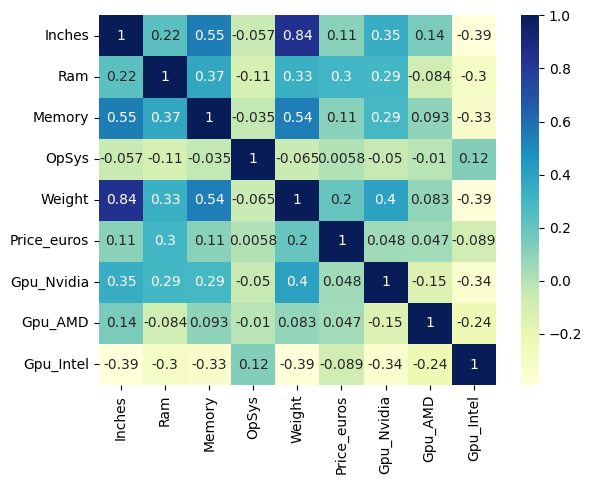

In [385]:
sns.heatmap(laptop_corr, cmap="YlGnBu", annot=True);


In [1]:
laptop.head()

NameError: name 'laptop' is not defined

In [ ]:
# crear la figura y el eje
fig, ax = plt.subplots()

# crear el gráfico de barras
ax.bar(nombres, valores)

# agregar etiquetas y título
ax.set_xlabel('Nombres')
ax.set_ylabel('Valores')
ax.set_title('Gráfico de barras')

# mostrar el gráfico
plt.show()
